# Predicting Heart Disease with Health Metrics and Lifestyle Choices

## Exploring modification of features and models to generate accurate predictions on heart disease

This study intends to generate a model that will predict whether an individual has a high likelihood of having heart disease. Features available will be modified as needed to enhance the accuracy of the predictions. Moreover, different models will be used to see which one will generate the highest accuracy.

This dataset was compiled by Kamil Pytlak and shared through Kaggle. The dataset is from the 2020 CDC Annual Survey Data of 400,000 adults with regard to their health condition.

Title: __Personal Key Indicators of Heart Disease__   
Source: __Kamil Pytlak__ from __Kaggle__  
Link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

## Import of Numpy and Pandas Libraries
Import of the following libraries will help open and inspect a few details of the dataset.

In [1]:
# Import of numpy and pandas
import numpy as np
import pandas as pd

In [2]:
# Open the csv file 'heart_2020_cleaned.csv'
hd = pd.read_csv('heart_2020_cleaned.csv')

# Inspect the first five rows
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Initial inspection of the dataset
This dataset has the following columns:
1. HeartDisease - Indicates if the respondent is positive of heart disease with 'Yes' or 'No' values.
2. BMI - Shows the respondent's Body Mass Index with a float format. BMI is computed by a respondent's weight divided by the squared value of their height.
3. Smoking - Indicates if the respondent is a smoker. This is answered through the CDC's question if a respondent has at least smoked 100 cigarettes in their life.
4. AlcoholDrinking - States if a male respondent has drank more than 14 drinks per week or if a female respondent has drank more than 7 drinks per week. If the mentioned metrics are true, 'Yes' is given as a value. 'No' if otherwise.
5. Stroke - Shows if a respondent has experienced a stroke.
6. PhysicalHealth - Shows the number of days where a respondent does not feel physically well for the past 30 days.
7. MentalHealth - Indicates the number of days where a respondent does not feel mentally well for the past 30 days.
8. DiffWalking - Indicates if a respondent has difficulty walking or climbing the stairs.
9. Sex - Determines if a respondent is male or female.
10. AgeCategory - Shows the age category of the respondent.
11. Race - Indicates the respondent's race or ethnicity.
12. Diabetic - Indicates if the respondent is diabetic or not.
13. PhysicalActivity - Respondents who declare they do physical activity or exercise in the past 30 days.
14. GenHealth - Asks respondents how they would categorize their general health.
15. SleepTime - Hours of sleep respondents take in 24-hour period.
16. Asthma - Indicates if the respondent has asthma.
17. KidneyDisease - States if the respondent has kidney disease.
18. SkinCancer - States if the respondent had been diagnosed with skin cancer.

In [3]:
# Determine the number of missing values for column and their dtypes.
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Notes of missing values and dtypes

There are no missing values found in the dataset. We can proceed to modify the features for the models that will be used.

## Features Engineering

### Change of 'Yes' or 'No' values to numericals
There are several columns that contain 'Yes' and 'No'. We can change them to numericals to better suit them for the models. We can assign '1' for 'Yes' and '0' for 'No'.

In [4]:
# Create dictionary as reference to replace the values in the DataFrame
hd_yes_no_map = {'Yes': 1, 'No': 0}
hd = hd.replace(hd_yes_no_map)
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


### Additional features modification for the 'Diabetic' column
There are additional values for the 'Diabetic' column that can be changed to '0'. These values, 'No, borderline diabetes' and 'Yes (during pregnancy)', will be classified as '0'. 'No, borderline diabetes' does not explicitly state that the respondent already has diabetes while 'Yes (during pregnancy)' might indicate Gestational Diabetes, which might only be temporary.

In [5]:
# Create additional dictionary values to modify the 'Diabetes' column
diabetes_map = {'No, borderline diabetes':0, 'Yes (during pregnancy)':0}
hd = hd.replace(diabetes_map)

In [6]:
# Change the values in the 'Sex' column to numerics. '1' for 'Male' and '0' for 'Female'
hd_male_female_map = {'Male': 1, 'Female': 0}
hd['Sex'] = hd['Sex'].map(hd_male_female_map)
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


### Categorize BMI column
The values in the BMI column can be classified to how the values represent the health condition of the respondents with respect to their weight the [US NIH states the following categories for BMI values](https://www.nhlbi.nih.gov/health/educational/lose_wt/risk.htm):

    Underweight - Below 18.5
    Normal - 18.5 to 24.9
    Overweight - 25.0 to 29.9
    Obesity - 30.0 and Above

We can generate a function to create categories for the column. We can later use the apply function to use the dictionary on the column.

In [7]:
# Create a function called 'bmi_map' to categorize the values in the 'BMI' column.
def bmi_map(f):
    if f < 18.5:
        return 'Underweight'
    elif (f >= 18.5) and (f <= 24.99):
        return 'Normal'
    elif (f >= 25.0) and (f <= 29.99):
        return 'Overweight'
    else:
        return 'Obese'

# Apply the 'bmi_map' function in the 'BMI' column. Assign the values to a new column called 'BMIcat'
hd['BMIcat'] = hd['BMI'].apply(bmi_map)
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIcat
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1,Underweight
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0,Normal
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0,Overweight
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1,Normal
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0,Normal


### Convert SleepTime column to binary
The values in the SleepTime column can be converted to binary. According to Mayo Clinic, it is recommended that adults achieve [at least 7 hours of sleep a day](https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/how-many-hours-of-sleep-are-enough/faq-20057898). Given this, if a respondent has achieved at least 7 hours of sleep, we can assign a value of '1'. If they slept less than 7 hours, we can assign '0'.

We can create a lambda function for this and use the apply function.

In [8]:
# Create lambda function inside apply function to generate binary values for 'SleepTime' column
hd['GoodSleep'] = hd['SleepTime'].apply(lambda i: 1 if i >= 7 else 0)
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIcat,GoodSleep
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1,Underweight,0
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0,Normal,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0,Overweight,1
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1,Normal,0
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0,Normal,1


### Notes on 'PhysicalHealth' and 'MentalHealth'

'PhysicalHealth' and 'MentalHealth' columns were not categorized since there are no clear categories backed by medical research to label the values. Moreover, there might be different reasons why respondents have given their scores.

Looking into the data, it appears that most values for both columns lean close to zero.

In [9]:
# Generate the most popular values with their contribution to the column for 'PhysicalHealth'.
hd['PhysicalHealth'].value_counts(normalize=True).head()

0.0     0.708545
30.0    0.061005
2.0     0.046530
1.0     0.032799
3.0     0.026945
Name: PhysicalHealth, dtype: float64

In [10]:
# Generate the most popular values with their contribution to the column for 'MentalHealth'.
hd['MentalHealth'].value_counts(normalize=True).head()

0.0     0.642290
30.0    0.054325
2.0     0.051580
5.0     0.044244
10.0    0.032874
Name: MentalHealth, dtype: float64

### Create categories for 'AgeCategory'
The column 'AgeCategory' can be further categorized to reduce the number of values to 4. We can create a dictionary for this and use the map function to assign the values.

In [11]:
# Create a dictionary to categorize the adults to 4 categories. Assign the results back to 'AgeCategory'.
hd_ages_dict = {'18-24':'Young Adult',
 '25-29':'Young Adult',
 '30-34':'Young Adult',
 '35-39':'Middle Adults',
 '40-44':'Middle Adults',
 '45-49':'Middle Adults',
 '50-54':'Older Adults',
 '55-59':'Older Adults',
 '60-64':'Older Adults',
 '65-69':'Late Adults',
 '70-74':'Late Adults',
 '75-79':'Late Adults',
 '80 or older':'Late Adults'}
hd['AgeCategory'] = hd['AgeCategory'].map(hd_ages_dict)
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIcat,GoodSleep
0,0,16.60,1,0,0,3.0,30.0,0,0,Older Adults,White,1,1,Very good,5.0,1,0,1,Underweight,0
1,0,20.34,0,0,1,0.0,0.0,0,0,Late Adults,White,0,1,Very good,7.0,0,0,0,Normal,1
2,0,26.58,1,0,0,20.0,30.0,0,1,Late Adults,White,1,1,Fair,8.0,1,0,0,Overweight,1
3,0,24.21,0,0,0,0.0,0.0,0,0,Late Adults,White,0,0,Good,6.0,0,0,1,Normal,0
4,0,23.71,0,0,0,28.0,0.0,1,0,Middle Adults,White,0,1,Very good,8.0,0,0,0,Normal,1


### Rescale the non-binary columns

Rescale the remaining non-binary columns to ensure to ensure the weights are appropriate for all columns.

In [12]:
# Rescale the following columns with minmax_scale.
from sklearn.preprocessing import minmax_scale

minmax_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
hd[minmax_columns] = minmax_scale(hd[minmax_columns])
hd[minmax_columns].head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.055294,0.100000,1.0,0.173913
1,0.100447,0.000000,0.0,0.260870
2,0.175782,0.666667,1.0,0.304348
3,0.147169,0.000000,0.0,0.217391
4,0.141132,0.933333,0.0,0.304348


### Create dummy columns
Create dummy columns for 'BMIcat', 'AgeCategory', 'Race', and 'GenHealth' for the model analysis.

In [13]:
dummy_columns = ['BMIcat', 'AgeCategory', 'Race', 'GenHealth']
for col in dummy_columns:
    dummy_col = pd.get_dummies(hd[col], prefix=col)
    hd = pd.concat([hd, dummy_col], axis=1)
    hd = hd.drop(columns=col)
hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.055294,1,0,0,0.100000,1.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0.175782,1,0,0,0.666667,1.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0.141132,0,0,0,0.933333,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### Visualization of the modified dataset with a heatmap
We can now see if the modified dataset has columns that have significant correlation with other columns.

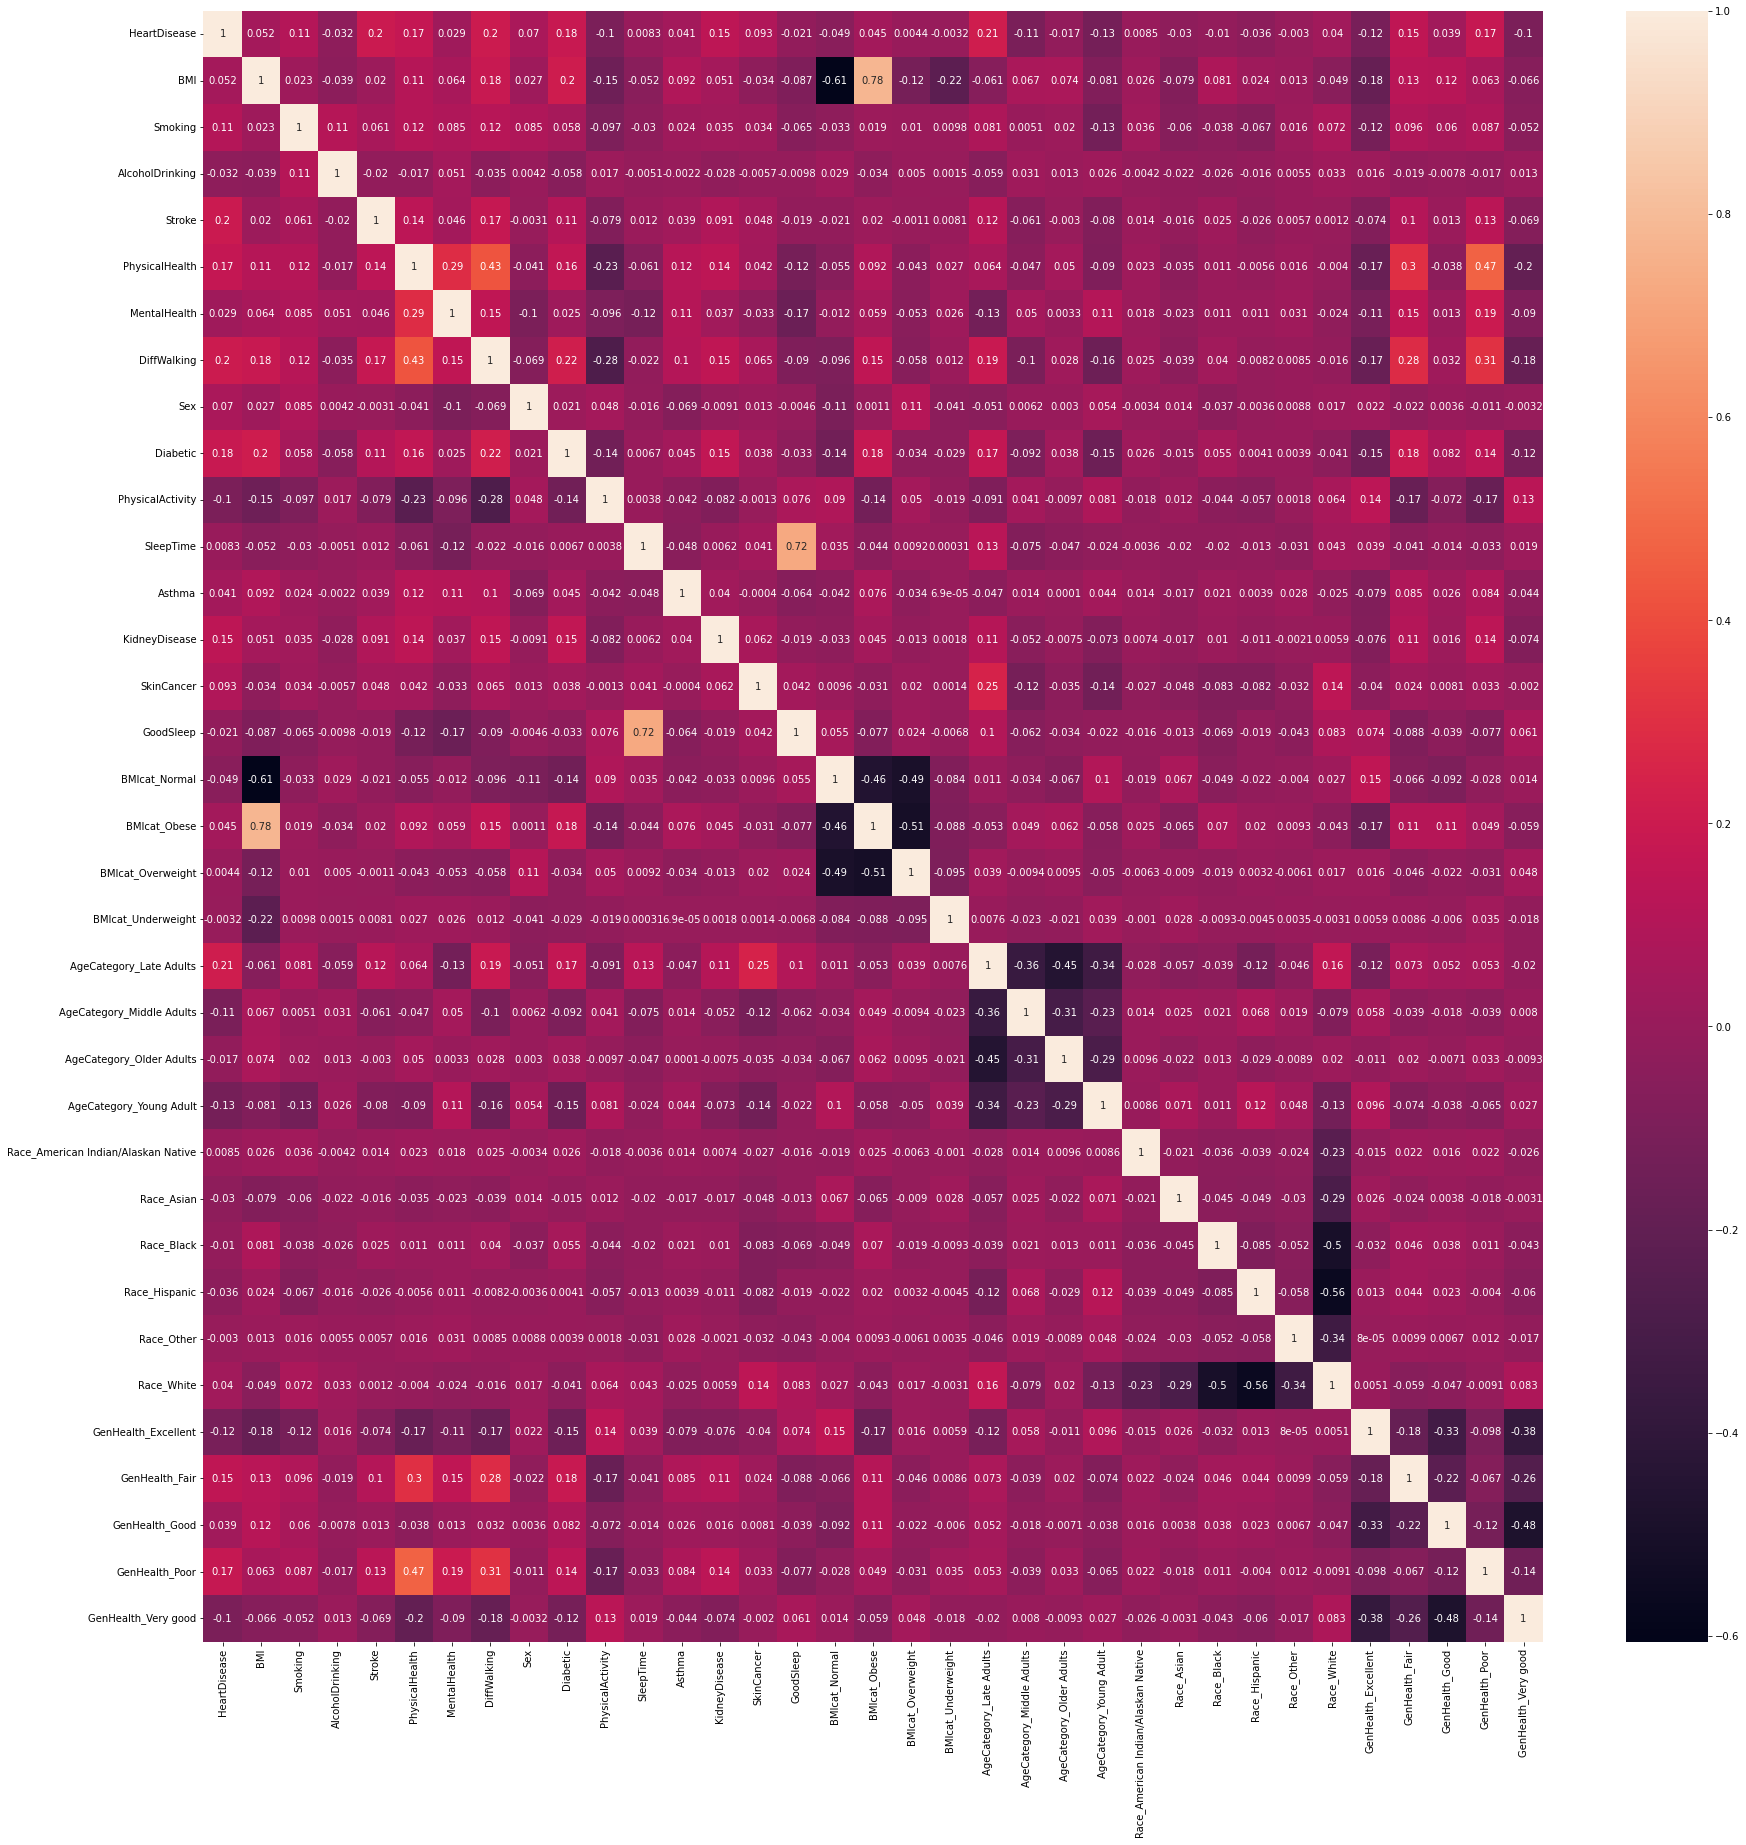

In [14]:
# Import matplotlib to visualize the modified dataset through a heatmap.
import matplotlib.pyplot as plt
%matplotlib inline

# Set the parameters of the plot.
fig, ax = plt.subplots(figsize=(30,30))

# Import Seaborn and use heatmap.
import seaborn as sns
ax = sns.heatmap(hd.corr(), annot=True)

We can continue with all of the features included.

### Randomize the dataset and isolate the target column
After modifying the dataset, we can now randomize the dataset and isolate the target column

In [15]:
# Randomize the rows of the dataset.
np.random.seed(1)
hd = hd.reindex(np.random.permutation(hd.index)).reset_index(drop=True)

#Create 'X' dataset to house the features.
X = hd.drop(columns='HeartDisease')

#Create 'y' to house the target values.
y = hd['HeartDisease']

### Implement RFECV to select the appropriate columns for the analysis
Recursive feature elimination with cross validation will determine which columns will be appropriate to use in the following models.

In [16]:
# Import LogisticRegression and RFECV.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Instantiate a Logistic Regression with 1000 maximum iterations.
lr = LogisticRegression(max_iter=1000)
selector = RFECV(lr)
selector.fit(X, y)

# Return boolean values to determine which columns to include with the 'support_' attribute.
X_cols = X.columns[selector.support_]

# Assign the chosen feature columns back to 'X'.
X = X[X_cols]

# Show which columns to use.
print(X_cols)

Index(['Smoking', 'Stroke', 'Sex', 'Diabetic', 'KidneyDisease',
       'AgeCategory_Late Adults', 'AgeCategory_Middle Adults',
       'AgeCategory_Older Adults', 'AgeCategory_Young Adult',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Poor',
       'GenHealth_Very good'],
      dtype='object')


## Model Selection and Tuning
After engineering the features of the dataset, we are going to select different models and parameters to determine which one creates the best predictions from the data

In [17]:
# Separate the train and test groups with the X and y datasets.

cutoff = int(X.shape[0]*0.7)
X_train = X.iloc[:cutoff,:]
y_train = y.iloc[:cutoff]
X_test = X.iloc[cutoff:,:]
y_test = y.iloc[cutoff:]

### Note on Implementation of Sensitivity and Specificity Values

Since the nature of this analysis is to predict if patients have heart disease or not, it is important to generate values that show how accurate our model is with respect to __finding all of the patients that actually have heart disease__ and __finding all of the patients that actually do not have heart disease__.

We need to find out __the count of all the patients we have labeled as having a heart disease when compared to the number of all patients that actually have heart disease__. This is the sensitivity value where we determine how successful did we label all of the respondents that actually have heart disease. Another term for sensitivity is true positive rate.

We also need to find out __the count of all patients that we have labeled not having a heart disease when compared to the number of all patients that actually do not have heart disease__. This is the specificity value where we determine the success rate of labeling patients that do not have heart disease. Another term for specificity is true negative rate.

As this dataset will predict values that can set direction for a patient to be tested further or not for heart disease, the TPR (true positive rate) should be as high as possible. It is better to __label a patient with heart disease incorrectly__ than to __label a patient without heart disease incorrectly__. In this way, more patients with heart disease could be attended to and not have patients with heart disease let go without medical attention.

While this can be done manually, scikit-learn has a function to produce these values. In this case, the TPR and TNR will be reflected through the 'Recall' figures.

In [18]:
from sklearn.metrics import classification_report

### Logistic Regression

We will first use Logistic Regression with the parameters 'balanced' for the 'class_weight' and 1000 for the 'max_iter'. We need to use 'balanced' for the 'class_weight' because there are signicantly more respondents that do not have heart disease compared to those who have. What will happen here is that the model will be more inclined to classify respondents as having heart disease. By having the 'class_weight' set to 'balanced', the model will act like the number of those who have heart disease is the same as those who do not.

On the other hand, the number of iterations needs to be set in order for the model to finish its computations completely.

In [19]:
# LogisticRegression already imported.
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
train_predictions = lr.predict(X_train)
lr_train_result = classification_report(y_train, train_predictions)
test_predictions = lr.predict(X_test)
lr_test_result = classification_report(y_test, test_predictions)
print(lr_train_result)
print(lr_test_result)

              precision    recall  f1-score   support

           0       0.97      0.73      0.83    204697
           1       0.21      0.79      0.34     19159

    accuracy                           0.73    223856
   macro avg       0.59      0.76      0.58    223856
weighted avg       0.91      0.73      0.79    223856

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87725
           1       0.21      0.78      0.33      8214

    accuracy                           0.73     95939
   macro avg       0.59      0.76      0.58     95939
weighted avg       0.91      0.73      0.79     95939



It can be noted that there is no overfitting with the models generated due to similar values for train and test. The TPR and TNR (reflected through the recall scores) generated similar values, but it is in the best interest to generate better prediction scores. Moreover, precision is low in detecting heart disease.

### Random Forests
Two functions will be used here: Grid Search with Cross Validation and Random Forests. The Grid Search will help generate the best parameters for the Random Forest. We will give parameters for the Grid Search to use for the Random Forest.

Note that we also have to set the 'class_weight' to 'balanced' since we're dealing with an imbalanced dataset.

In [20]:
# Import GridSearchCV and RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier()

# Set the parameters to be used by GridSearchCV
hyperparameters = {'max_depth':[5,10],
                   'min_samples_split':[10,20],
                   'min_samples_leaf':[5,10],
                   'random_state':[1],
                   'class_weight':['balanced']
                    }

# Set the CV folds to 5
grid = GridSearchCV(clf, param_grid=hyperparameters, cv=5)

# Fit the train features and train targets
grid.fit(X_train, y_train)

# Generate accuracy score for the train dataset
train_predictions = grid.predict(X_train)
grid_train_result = classification_report(y_train, train_predictions)

# Generate accuracy score for the test dataset
test_predictions = grid.predict(X_test)
grid_test_result = classification_report(y_test, test_predictions)
print('Best Grid Parameters: {}'.format(grid.best_params_))
print('Best Grid Score: {}'.format(grid.best_score_))
print('Train Prediction Score')
print(grid_train_result)
print('Test Prediction Score')
print(grid_test_result)

Best Grid Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 1}
Best Grid Score: 0.7193776378155312
Train Prediction Score
              precision    recall  f1-score   support

           0       0.98      0.70      0.82    204697
           1       0.21      0.82      0.33     19159

    accuracy                           0.71    223856
   macro avg       0.59      0.76      0.57    223856
weighted avg       0.91      0.71      0.78    223856

Test Prediction Score
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     87725
           1       0.20      0.81      0.33      8214

    accuracy                           0.71     95939
   macro avg       0.59      0.76      0.57     95939
weighted avg       0.91      0.71      0.78     95939



The True Positive Rate increased to 81% while the True Negative Rate decreased to roughly 70%.

### Neural Networks

We'll attempt to use neural networks for this analysis and see if there will be better results.

In [21]:
# Import MLPClassifier
from sklearn.neural_network import MLPClassifier

# Set three hidden layers with 30 neurons each. Set random_state to 1
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=1)
mlp.fit(X_train, y_train)
train_predictions = mlp.predict(X_train)
mlp_train_result = classification_report(y_train, train_predictions)
test_predictions = mlp.predict(X_test)
mlp_test_result = classification_report(y_test, test_predictions)
print('Train Prediction Score')
print(mlp_train_result)
print('Test Prediction Score')
print(mlp_test_result)

Train Prediction Score
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    204697
           1       0.55      0.09      0.15     19159

    accuracy                           0.92    223856
   macro avg       0.73      0.54      0.55    223856
weighted avg       0.89      0.92      0.89    223856

Test Prediction Score
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87725
           1       0.57      0.09      0.16      8214

    accuracy                           0.92     95939
   macro avg       0.75      0.54      0.56     95939
weighted avg       0.89      0.92      0.89     95939



### Note on Neural Networks performance outputs

Note that the train and test prediction scores are significantly higher compared to the previous models we tested. However, it is important to point out that the True Positive Rate has declined significantly. What happened here is that the data that we used is not balanced: there are more respondents that do not have heart disease compared to those who have. The dataframe will incorrectly label the respondents due to this.

Unfortunately, the MLPClassifier does not have a parameter for weights. In this case, we have to set the balancing manually and set an equal number of respondents for both groups.

In [22]:
# Get total row count of respondents who have heart disease.
hd_row_count = X[y == 1].shape[0]

# Get the rows for X and y of respondents who have heart disease.
mlp_X_hd = X[y == 1]
mlp_y_hd = y[y == 1]

# Get the equal number of rows for respondents who do not have heart disease.
mlp_X_no_hd = X[y == 0].iloc[:hd_row_count,:]
mlp_y_no_hd = y[y == 0].iloc[:hd_row_count]

# Combine datasets of both groups.
mlp_X = pd.concat([mlp_X_hd, mlp_X_no_hd])
mlp_y = pd.concat([mlp_y_hd, mlp_y_no_hd])
hd_balanced = pd.concat([mlp_X, mlp_y], axis=1)

# Randomize the rows of the dataset.
hd_balanced = hd_balanced.reindex(np.random.permutation(hd_balanced.index)).reset_index(drop=True)

# Assign feature columns.
X_balanced = hd_balanced.drop(columns='HeartDisease')

# Assign target column
y_balanced = hd_balanced['HeartDisease']

# Set row cutoff for train and test dataframes at 70% for train.
balanced_cutoff = int(hd_balanced.shape[0]*0.7)

# Assign X and y for both train and test groups.
X_bal_train = X_balanced.iloc[:balanced_cutoff, :]
X_bal_test = X_balanced.iloc[balanced_cutoff:, :]
y_bal_train = y_balanced.iloc[:balanced_cutoff]
y_bal_test = y_balanced.iloc[balanced_cutoff:]

### Neural Networks with Grid Search

We're going to create a model that will involve both Grid Search and MLPClassifier. We'll identify the best activation functions along with the best solver.

In [23]:
# Instantiate an MLPClassifer
mlp = MLPClassifier()

# Set hyperparameters
hyperparameters = {'hidden_layer_sizes':[(30,30,30)],
                   'activation':['relu', 'logistic', 'tanh'],
                   'solver':['sgd', 'adam'],
                   'max_iter':[2000],
                   'random_state':[1]
                    }

# Generate GridSearchCV
grid = GridSearchCV(mlp, param_grid=hyperparameters, cv=3)
grid.fit(X_bal_train, y_bal_train)
train_predictions = grid.predict(X_bal_train)
grid_train_result = classification_report(y_bal_train, train_predictions)
test_predictions = grid.predict(X_bal_test)
grid_test_result = classification_report(y_bal_test, test_predictions)
print('Best Grid Parameters: {}'.format(grid.best_params_))
print('Best Grid Score: {}'.format(grid.best_score_))
print('Train Prediction Score:')
print(grid_train_result)
print('Test Prediction Score:')
print(grid_test_result)

Best Grid Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (30, 30, 30), 'max_iter': 2000, 'random_state': 1, 'solver': 'adam'}
Best Grid Score: 0.761833933510777
Train Prediction Score:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75     19159
           1       0.74      0.80      0.77     19163

    accuracy                           0.76     38322
   macro avg       0.76      0.76      0.76     38322
weighted avg       0.76      0.76      0.76     38322

Test Prediction Score:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      8214
           1       0.74      0.79      0.76      8210

    accuracy                           0.76     16424
   macro avg       0.76      0.76      0.76     16424
weighted avg       0.76      0.76      0.76     16424



The best TPR produced is at 79% with Neural Networks and Grid Search while the TNR produced is at 72%. It is also important to note that precision in identifying heart disease increased significantly at 74%.

### Stacking Classifier
Let's try to use Stacking Classifier next to see if we can improve our score. We will use the parameters we were able to obtain from the Grid Searches for Random Forests and Neural Networks.

In [24]:
# Import StackingClassifier.
from sklearn.ensemble import StackingClassifier

# Create a list for the estimators and use the parameters obtained from the Grid Searches.
estimators_list = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000)),
    ('rfc', RandomForestClassifier(class_weight= 'balanced',
                                   max_depth= 10,
                                   min_samples_leaf= 5,
                                   min_samples_split= 20,
                                   random_state= 1)),
    ('mlp', MLPClassifier(activation= 'logistic',
                          hidden_layer_sizes= (30, 30, 30),
                          max_iter= 2000,
                          random_state= 1,
                          solver= 'adam'))
]

# Create instance of StackingClassifier with Gradient Boosting as the final_estimator.
from sklearn.ensemble import GradientBoostingClassifier
clf = StackingClassifier(estimators=estimators_list,
                         final_estimator=GradientBoostingClassifier(n_estimators=1000, random_state=1))

clf.fit(X_bal_train, y_bal_train)
predictions = clf.predict(X_bal_test)
test_result = classification_report(y_bal_test, predictions)
print('Test Prediction Score')
print(test_result)

Test Prediction Score
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      8214
           1       0.72      0.82      0.77      8210

    accuracy                           0.75     16424
   macro avg       0.76      0.75      0.75     16424
weighted avg       0.76      0.75      0.75     16424



The following ensemble was able to generate an accuracy score of 75% with a recall of 82% and 68% for 1 and 0, respectively.

### Voting Classifier
We can use the voting classifier to see if we can continue to generate a better result. We'll use 'soft' for the 'voting' parameter.

In [25]:
# Import VotingClassifier
from sklearn.ensemble import VotingClassifier

# Create a list of estimators for the VotingClassifier.
estimators_list = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000)),
    ('rfc', RandomForestClassifier(class_weight= 'balanced',
                                   max_depth= 10,
                                   min_samples_leaf= 5,
                                   min_samples_split= 20,
                                   random_state= 1)),
    ('mlp', MLPClassifier(activation= 'logistic',
                          hidden_layer_sizes= (30, 30, 30),
                          max_iter= 2000,
                          random_state= 1,
                          solver= 'adam'))
]

# Create instance of VotingClassifier with the estimators list and preferred voting parameters.
clf = VotingClassifier(estimators=estimators_list,
                         voting='soft')

clf.fit(X_bal_train, y_bal_train)
predictions = clf.predict(X_bal_test)
test_result = classification_report(y_bal_test, predictions)
print('Test Prediction Score')
print(test_result)

Test Prediction Score
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      8214
           1       0.74      0.79      0.76      8210

    accuracy                           0.76     16424
   macro avg       0.76      0.76      0.76     16424
weighted avg       0.76      0.76      0.76     16424



The Voting Classifier generated an accuracy score of 76% with recall scores of 79% and 72% for 1 and 0, respectively.

## Conclusion

The best TPR produced is at 82% with Stacking Classifier while the TNR produced is at 68%. It is also important to note that precision in identifying heart disease increased significantly at 75%.

While it appears that the model values generated by this analysis are similar, it is still recommended to pursue other models and features to increase the TPR and TNR.

A possible reason impeding the generation of better accuracy scores is the imbalanced dataset. There might be more suitable libraries to handle this predicament. Unfortunately, as of the time this analysis is conducted, imbalanced-learn is not yet available for the Mac ARM64 architecture.